# Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Read Dataset


In [2]:
X = pd.read_csv('Dataset/contextual_features.csv',index_col = 0)

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # To encode the string of the Gender Column
for column_name in X.columns:
    if X[column_name].dtype == object:
        X[column_name] = le.fit_transform(X[column_name])
    else:
        pass

In [4]:
X

,Gender,Age,Height,Weight,BMI,Workout Par Rate,Average Workout Time,STD Workout Time,Average Calories Burnt,STD Calories Burnt,Number of Sessions
ID,,,,,,,,,,,
1001,0,23.0,1.600000,52.000000,20.312500,0.700000,1.476190,0.578565,304.000000,131.362820,21
1002,1,19.0,1.800000,80.000000,24.691358,0.800000,1.333333,0.384900,276.875000,94.906698,24
1003,1,20.0,1.830000,66.000000,19.707964,0.866667,1.423077,0.504700,302.538462,121.595039,26
1004,1,25.0,1.780000,78.000000,24.618104,0.733333,1.454545,0.548202,310.727273,131.112156,22
1005,0,19.0,1.640000,53.000000,19.705532,0.766667,1.391304,0.461557,288.608696,112.539132,23
1006,0,51.0,1.590000,50.000000,19.777699,0.800000,1.000000,0.000000,228.041667,49.810038,24
1007,1,19.0,1.830000,82.000000,24.485652,0.733333,1.000000,0.000000,249.272727,39.838517,22
1008,1,18.0,1.870000,67.000000,19.159827,0.733333,1.000000,0.000000,219.000000,38.772061,22
1009,0,24.0,1.560000,60.000000,24.654832,0.733333,1.000000,0.000000,232.954545,41.756303,22


# Normalize the datset

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Let us visualize the dendogram formed by the dataset by the method of ward linkage

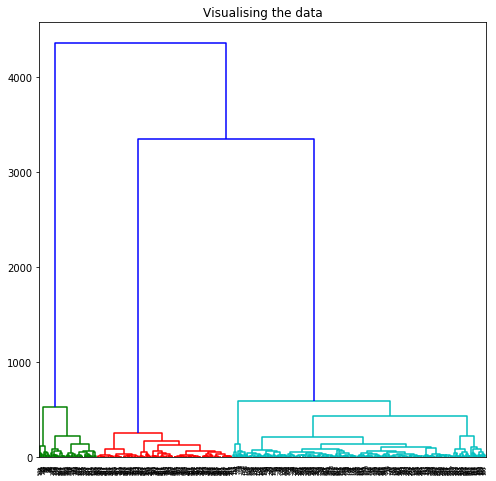

In [6]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

# Clustering

Let us perform Hierarchichal Agglomerative Clustering with number of clusters varying from 2 to 8 and find the best possible number by finding and comparing silhouetter scores of each

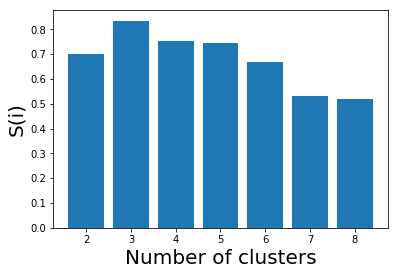

[0.6985758505171373, 0.834312806172881, 0.7521500135522168, 0.744761180837283, 0.6679605986385379, 0.5297559434064559, 0.5193633302135896]


In [7]:
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
ac7 = AgglomerativeClustering(n_clusters = 7)
ac8 = AgglomerativeClustering(n_clusters = 8)


k = [2, 3, 4, 5, 6, 7, 8]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X, ac2.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac3.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac4.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac5.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac6.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac7.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac8.fit_predict(X)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()
print(silhouette_scores)


Since having n_clusters as 7 had the best silhoutte score we would like to proceed with 7 clusters.

Let us assign the cluster label to the dataset and save it

In [16]:
cluster = ac3.fit(X)
cl_labels = cluster.labels_

df = pd.read_csv('Dataset/contextual_features.csv')
df

,ID,Gender,Age,Height,Weight,BMI,Workout Par Rate,Average Workout Time,STD Workout Time,Average Calories Burnt,STD Calories Burnt,Number of Sessions
0,1001,Female,23.0,1.600000,52.000000,20.312500,0.700000,1.476190,0.578565,304.000000,131.362820,21
1,1002,Male,19.0,1.800000,80.000000,24.691358,0.800000,1.333333,0.384900,276.875000,94.906698,24
2,1003,Male,20.0,1.830000,66.000000,19.707964,0.866667,1.423077,0.504700,302.538462,121.595039,26
3,1004,Male,25.0,1.780000,78.000000,24.618104,0.733333,1.454545,0.548202,310.727273,131.112156,22
4,1005,Female,19.0,1.640000,53.000000,19.705532,0.766667,1.391304,0.461557,288.608696,112.539132,23
5,1006,Female,51.0,1.590000,50.000000,19.777699,0.800000,1.000000,0.000000,228.041667,49.810038,24
6,1007,Male,19.0,1.830000,82.000000,24.485652,0.733333,1.000000,0.000000,249.272727,39.838517,22
7,1008,Male,18.0,1.870000,67.000000,19.159827,0.733333,1.000000,0.000000,219.000000,38.772061,22
8,1009,Female,24.0,1.560000,60.000000,24.654832,0.733333,1.000000,0.000000,232.954545,41.756303,22
9,1010,Female,19.0,1.510000,45.000000,19.735976,0.700000,1.000000,0.000000,218.476190,40.763685,21


In [17]:
df["Cluster"] = cl_labels
df.to_csv("clustered_data.csv",index = 0)

In [10]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = SilhouetteVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'